In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Dealing with Missing Values

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Since very less missing values, so we can directly drop these

In [6]:
train_data.dropna(inplace=True)

In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Preprocessing to make our data ready for Analysis

In [8]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### From description we can see that Date_of_Journey is a object data type, therefore we have to convert this datatype into timestamp so as to use this column properly for prediction
     This is because our model will not be able to understand Theses string values, it just understand Time-stamp.
     So for this we require pandas to_datetime to convert object data type to datetime dtype.

     dt.day method will extract only day of that date
     dt.month method will extract only month of that date

In [9]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])
    

In [10]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### Storing our Journey date and month in seperate columns

In [13]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day

In [14]:
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-22 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-22 05:50:00,2021-07-22 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-22 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-22 18:05:00,2021-07-22 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-22 16:50:00,2021-07-22 21:35:00,4h 45m,1 stop,No info,13302,3,1


#### Since we have converted Date_of_Journey column into integers, now we can drop as it is of no use.

In [16]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-22 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-22 05:50:00,2021-07-22 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-22 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-22 18:05:00,2021-07-22 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-22 16:50:00,2021-07-22 21:35:00,4h 45m,1 stop,No info,13302,3,1


#### Define function to extract hour & minute of Dep_Time and Arrival_Time

In [18]:
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [19]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
extract_hour(train_data,'Dep_Time')

# Extracting Minutes
extract_min(train_data,'Dep_Time')

# Now we can drop Dep_Time as it is of no use
drop_column(train_data,'Dep_Time')

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-22 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-22 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [21]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(train_data,'Arrival_Time')

# Extracting minutes
extract_min(train_data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(train_data,'Arrival_Time')

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
'2h 50m'.split(' ')

['2h', '50m']

In [24]:
print(train_data['Duration'].values)

['2h 50m' '7h 25m' '19h' ... '3h' '2h 40m' '8h 20m']


#### Applying pre-processing on duration column and separating duration hours and minute from duration

In [25]:
duration=list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [26]:
train_data['Duration']=duration

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [28]:
'2h 50m'.split(' ')[0][0:-1]

'2'

In [29]:
def hour(x):
    return x.split(' ')[0][0:-1]


In [30]:
def min(x):
    return x.split(' ')[1][0:-1]

In [31]:

train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [33]:
train_data.drop('Duration',axis=1,inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [35]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [36]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [37]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [38]:

train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [39]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int64
Journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

#### Categorical Data

In [40]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

#### Numerical Data

In [41]:
cont_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

### Handling Categorical Data


#### We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order         --> LabelEncoder is used in this case

In [42]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [43]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

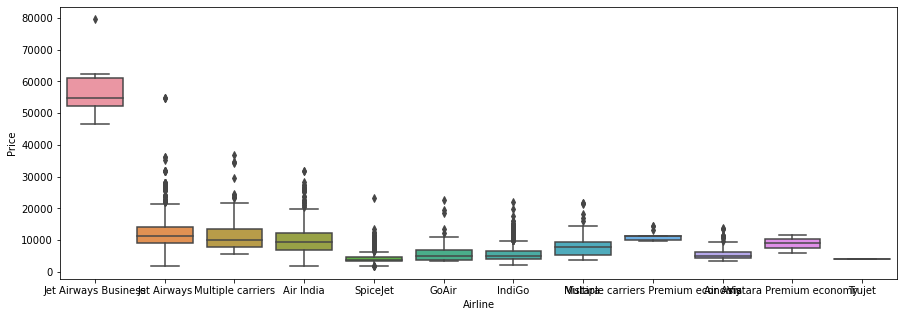

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=train_data.sort_values('Price',ascending=False))

##### Conclusion-->  From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

#### Perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

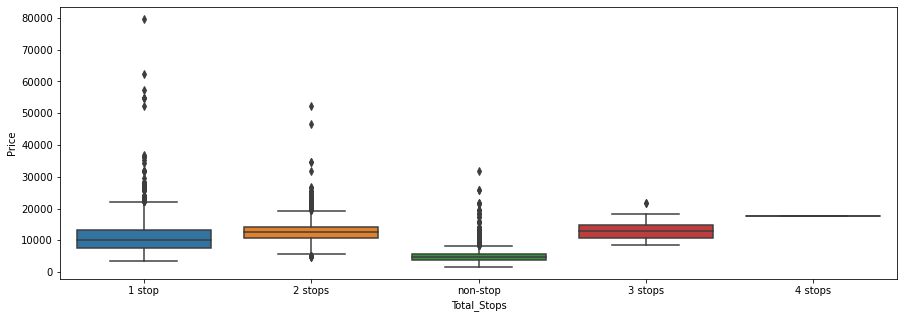

In [45]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=train_data.sort_values('Price',ascending=False))

In [46]:
len(categorical['Airline'].unique())  #or use len(categorical['Airline'].value_counts())

12

In [47]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [48]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<Figure size 1080x360 with 0 Axes>

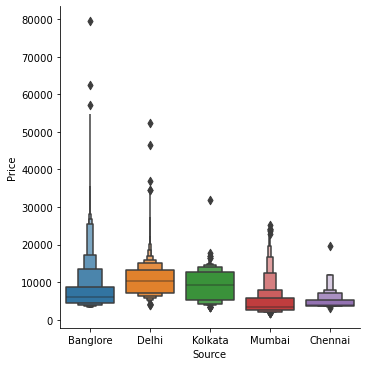

In [49]:
# Source vs Price

plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=train_data.sort_values('Price',ascending=False),kind='boxen')

In [50]:
# As Source is Nominal Categorical data we will perform OneHotEncoding


Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [51]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [52]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [53]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [54]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [55]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [56]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)

In [57]:
categorical.head()
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [58]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



#### As we have lots of features in Route , one hot encoding will not be a better option so we appply Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [60]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [61]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [62]:
categorical['Additional_Info'] = train_data['Additional_Info']

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

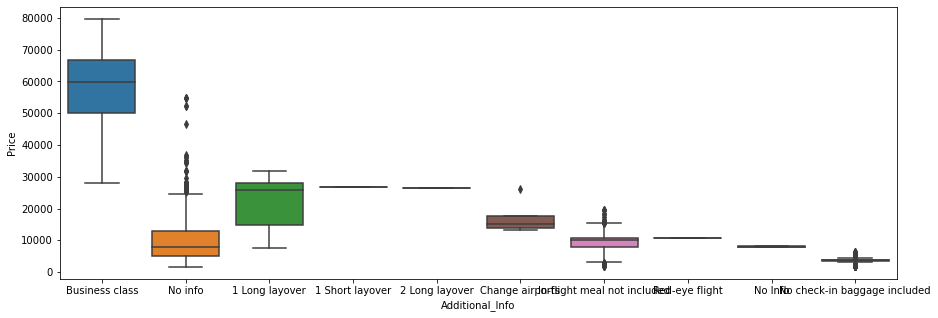

In [63]:
count = 0
temp = categorical['Additional_Info'].values
for x in temp:
    if x == 'No info':
        count += 1
    else:
        pass
print(categorical['Additional_Info'].value_counts())
plt.figure(figsize=(15,5))
sns.boxplot('Additional_Info','Price',data=train_data.sort_values('Price',ascending=False))

In [64]:
for x in ['Additional_Info']:
    categorical[x] = categorical[x].replace('No Info','No info')
    categorical[x] = categorical[x].replace('1 Short layover','No info')
    categorical[x] = categorical[x].replace('Red-eye flight','No info')
    categorical[x] = categorical[x].replace('2 Long layover','No info')
categorical['Additional_Info'].value_counts()

No info                         8350
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Name: Additional_Info, dtype: int64

In [65]:
Additional = pd.get_dummies(categorical['Additional_Info'],drop_first=True)
Additional

,Business class,Change airports,In-flight meal not included,No check-in baggage included,No info
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,1
10679,0,0,0,0,1
10680,0,0,0,0,1
10681,0,0,0,0,1


In [66]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
    
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [67]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


In [68]:
categorical['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [69]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [70]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [71]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [72]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [73]:
train_data[cont_col]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,5,1,5,50,13,15,7,25
2,13882,6,9,9,25,4,25,19,0
3,6218,5,12,18,5,23,30,5,25
4,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,4,9,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,3,1,11,30,14,10,2,40


In [74]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

data_train=pd.concat([categorical,Airline,Source,Destination,Additional,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,No info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,1,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,0,...,1,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,0,...,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,0,...,1,13302,3,1,16,50,21,35,4,45


In [75]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [76]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,No info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,1,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,1,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,1,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [77]:
pd.set_option('display.max_columns',40)

In [78]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Business class,Change airports,In-flight meal not included,No check-in baggage included,No info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [79]:
data_train.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Business class', 'Change airports',
       'In-flight meal not included', 'No check-in baggage included',
       'No info', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

## Outlier Detection

In [80]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

<Figure size 2160x1440 with 0 Axes>

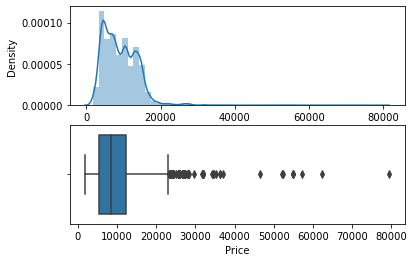

In [81]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

### Dealing with Outliers

In [82]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

<Figure size 2160x1440 with 0 Axes>

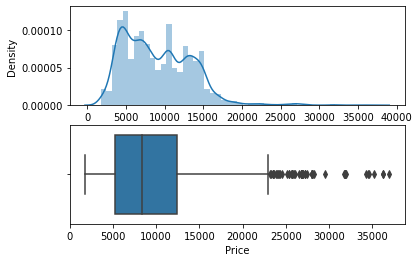

In [83]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

### Separating independent & dependent data

In [84]:
X=data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Business class,Change airports,In-flight meal not included,No check-in baggage included,No info,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,1,16,50,21,35,4,45


In [85]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [86]:
type(X)

pandas.core.frame.DataFrame

In [87]:
type(y)

pandas.core.series.Series

In [88]:
X.isnull().sum()

Total_Stops                          0
Route_1                              0
Route_2                              0
Route_3                              0
Route_4                              0
Route_5                              0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                               0
Delhi                                0
Hyderabad                            0
Kolkata                              0
New Delhi                

In [89]:
y.isnull().sum()

0

#### As now we dont have any missing value in data, we can definitely go ahead with Feature Selection

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [90]:
###np.array(X)

In [91]:
##np.array(y)

### I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

####  Feature Selection using Information Gain,

In [92]:
from sklearn.feature_selection import mutual_info_classif

In [93]:
#mutual_info_classif()

In [94]:
###mutual_info_classif(np.array(X),np.array(y))

In [95]:
X.dtypes

Total_Stops                          int64
Route_1                              int32
Route_2                              int32
Route_3                              int32
Route_4                              int32
Route_5                              int32
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin                               uint8
Delhi                                uint8
Hyderabad  

In [96]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.184696
Route_1,2.028375
Route_2,2.747111
Route_3,2.289754
Route_4,1.470503
Route_5,0.735557
Air India,0.764701
GoAir,0.091440
IndiGo,0.665358
Jet Airways,0.936472


In [97]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.747111
Route_3,2.289754
Total_Stops,2.184696
Route_1,2.028375
No info,1.960187
Arrival_Time_hour,1.831179
Duration_hours,1.780408
Delhi,1.543945
Arrival_Time_minute,1.538264
Cochin,1.533750


#### Keeping only those features whose 'importance' is greater than 1

In [98]:
col_names = set()
for i in range(0,39):
    if imp.importance[i]<0.74:
        col_names.add(str(imp.index[i]))
col_names

{'Business class',
 'Change airports',
 'Chennai',
 'Delhi',
 'GoAir',
 'Hyderabad',
 'In-flight meal not included',
 'IndiGo',
 'Jet Airways Business',
 'Kolkata',
 'Multiple carriers',
 'Multiple carriers Premium economy',
 'Mumbai',
 'New Delhi',
 'No check-in baggage included',
 'Route_5',
 'SpiceJet',
 'Trujet',
 'Vistara',
 'Vistara Premium economy'}

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Route_1                            10682 non-null  int32
 2   Route_2                            10682 non-null  int32
 3   Route_3                            10682 non-null  int32
 4   Route_4                            10682 non-null  int32
 5   Route_5                            10682 non-null  int32
 6   Air India                          10682 non-null  uint8
 7   GoAir                              10682 non-null  uint8
 8   IndiGo                             10682 non-null  uint8
 9   Jet Airways                        10682 non-null  uint8
 10  Jet Airways Business               10682 non-null  uint8
 11  Multiple carriers                  10682 non-null  uint8
 12  Multiple carriers 

In [100]:
col_names = list(col_names)
for col in col_names:
    drop_column(X, col)

In [101]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Total_Stops          10682 non-null  int64
 1   Route_1              10682 non-null  int32
 2   Route_2              10682 non-null  int32
 3   Route_3              10682 non-null  int32
 4   Route_4              10682 non-null  int32
 5   Air India            10682 non-null  uint8
 6   Jet Airways          10682 non-null  uint8
 7   Cochin               10682 non-null  uint8
 8   No info              10682 non-null  uint8
 9   Journey_day          10682 non-null  int64
 10  Journey_month        10682 non-null  int64
 11  Dep_Time_hour        10682 non-null  int64
 12  Dep_Time_minute      10682 non-null  int64
 13  Arrival_Time_hour    10682 non-null  int64
 14  Arrival_Time_minute  10682 non-null  int64
 15  Duration_hours       10682 non-null  int32
 16  Duration_mins        1

#### Split dataset into train & test

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [104]:
X_train

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Air India,Jet Airways,Cochin,No info,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
508,1,2,14,3,13,0,0,0,1,21,5,20,20,18,50,22,30
3071,1,2,20,3,13,0,0,0,1,24,3,6,35,14,25,7,50
2036,1,0,7,8,13,0,1,0,1,3,6,22,50,10,25,11,35
49,2,3,0,4,5,0,1,1,0,27,6,23,5,19,0,19,55
9686,0,2,5,29,13,0,0,0,1,27,5,22,15,0,50,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9226,0,0,13,29,13,0,0,0,1,6,3,11,10,13,55,2,45
4859,2,3,16,4,5,1,0,1,1,6,9,22,0,19,15,21,15
3264,1,3,7,6,13,0,1,1,1,3,3,8,0,4,25,20,25
9846,2,3,20,22,5,0,0,1,1,3,3,13,5,21,20,8,15


In [105]:
from sklearn import metrics
##dump your model using pickle so that we will re-use
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    
    if dump==1:
        ##dump your model using pickle so that we will re-use
        file=open('model.pkl','wb')
        pickle.dump(model,file)

#### RandomForest Regressor

In [106]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9804410263480464
predictions are: 
 [14659.47   6000.45  10458.725 ... 10753.045 10067.55   4203.04 ]


r2 score: 0.8807289687589024
MAE: 733.8182164638902
MSE: 2384533.000407472
RMSE: 1544.1933170453342


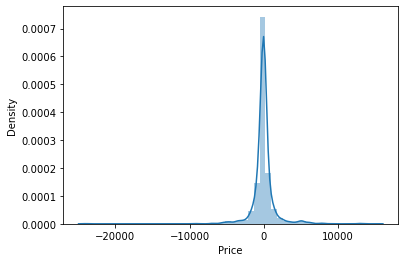

In [107]:
predict(RandomForestRegressor(random_state=19),0)

In [108]:
rf_reggressor = RandomForestRegressor(random_state=19)
rf_reggressor.fit(X_train,y_train)
predicted = rf_reggressor.predict(X_test)
metrics.r2_score(y_test,predicted)

0.8807289687589024

In [109]:
print('MAE',metrics.mean_absolute_error(y_test,predicted))
print('MSE',metrics.mean_squared_error(y_test,predicted))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predicted)))

MAE 733.8182164638902
MSE 2384533.000407472
RMSE 1544.1933170453342


### Trying multiple Algorithms

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

Training score : 0.6171023869016534
predictions are: 
 [13177.4553707   7076.34916261  2946.56854591 ...  9570.72426394
 10554.95975931  5183.6848566 ]


r2 score: 0.6046156421576193
MAE: 1930.1130764996417
MSE: 7904744.6752955355
RMSE: 2811.5377776753303


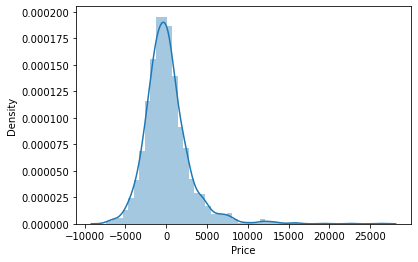

In [111]:
predict(LinearRegression(),0)

Training score : 0.7848531500051413
predictions are: 
 [12586.6  6164.8  6929.4 ... 12252.6 11789.2  3983.8]


r2 score: 0.6588031641317589
MAE: 1731.4801123069724
MSE: 6821397.5036218995
RMSE: 2611.7805236317045


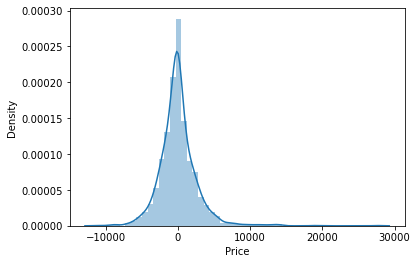

In [112]:
 predict(KNeighborsRegressor(),0)

### After comparing the training score of our different models, RandomForestRegressor turns out to be the best

#### Hyperparameter Tuning to get a higher accuracy
    1.We can choose following methods for hyperparameter tuning:-
        a.RandomizedSearchCV --> Fast way to Hypertune model
        b.GridSearchCV       --> Slow way to hypertune my model
    
    2.Assign hyperparameters in form of dictionary
    3.Fit the model
    4.Check best paramters and best score

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [115]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [116]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [117]:
### initialise your estimator
reg_rf=RandomForestRegressor()

In [118]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=10,verbose=2,n_jobs=-1)

In [119]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [121]:
reg_rf = RandomForestRegressor(n_estimators= 980,
 min_samples_split= 10,
 max_features= 'auto',
 max_depth= 13,random_state=19)

In [122]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, min_samples_split=10, n_estimators=980,
                      random_state=19)

In [123]:
prediction=reg_rf.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

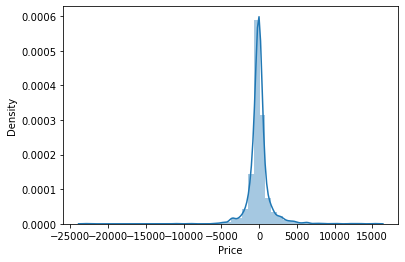

In [124]:
sns.distplot(y_test-prediction)

In [125]:
metrics.r2_score(y_test,prediction)

0.8843430847598125

In [126]:
print('MAE',metrics.mean_absolute_error(y_test,prediction))
print('MSE',metrics.mean_squared_error(y_test,prediction))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 792.3417941670087
MSE 2312277.576925385
RMSE 1520.6174985595112


### OBSERVATION: 
> After applying hypermater tuning we see our training score went from 0.880 to 0.884 which is not a significant change.

## Saving the model to reuse it again

In [127]:
import pickle

In [128]:
# open a file, where you want to store the data
file=open('rf_random.pkl','wb')

In [129]:
# dump information to that file
pickle.dump(rf_random,file)

In [130]:
model=open('rf_random.pkl','rb')
forest=pickle.load(model)

In [148]:
y_prediction=forest.predict(X_test)

In [149]:
y_prediction

array([14707.46707483,  6211.68111461,  9487.92451825, ...,
       10498.96452083, 10070.63869309,  4148.80680813])

In [150]:
metrics.r2_score(y_test,y_prediction)

0.8837808960511433